# <font style = "color:rgb(50,120,229)">Alpha Blending</font>

Alpha blending is the process of overlaying a foreground image with transparency over a background image. The transparency is often the fourth channel of an image ( e.g. in a transparent PNG), but it can also be a separate image. This transparency mask is often called the **alpha mask** or the **alpha matte**.

The math behind alpha blending is straightforward. At **every pixel** of the image, we need to combine the foreground image color (F) and the background image color (B) using the alpha mask (⍺).

**<font style = "color:rgb(255,0,0)">Note: </font>** The value of ⍺ used in the equation is actually the pixel value in the alpha mask divided by 255. So, the final alpha blended image(I) is given by the equation below, 0≤ ⍺ ≤ 1
$$ 
I = \alpha F + (1−\alpha) B 
$$

From the equation above, one can make the following observations.

1. When $\alpha$ = 0, the output pixel color is the background.

2. When $\alpha$ = 1, the output pixel color is simply the foreground.

3. When $0 \leq \alpha \leq 1$, the output pixel color is a mix of the background and the foreground. For realistic blending, the boundary of the alpha mask usually has pixels that are between 0 and 1.

Let us look at an example.
<table style="width:100%">
  <tr>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-backgroundImage.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-backgroundImage.jpg"/></a></center></th>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-foregroundImage.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-foregroundImage.png"/></a></center></th>
  </tr>
  <tr>
      <td><center>Background Image</center></td>
      <td><center>Foreground Image</center></td>
  </tr>
  <tr>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaMask.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaMask.png"/></a></center></th>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaBlendedmage.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaBlendedmage.png"/></a></center></th>
  </tr>
  <tr>
      <td><center>Alpha Mask</center></td>
      <td><center>Alpha Blended Image</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>The background image is shown on the top left, the foreground image is shown on the top right,  the gray scale alpha mask is shown on the bottom left,  and the composite image obtained by alpha blending the foreground image and the background image using an alpha mask is shown in the bottom right.</center></td>
  </tr>
</table>

## <font style = "color:rgb(50,120,229)">Alpha Blending in OpenCV</font>

The following Python code provides the implementation of Alpha Blending. The comments in code explain the various steps. 

In [1]:
#include "includeLibraries.h"
#include <opencv2/opencv.hpp>
#include "matplotlibcpp.h"
#include "displayImages.h"

In [2]:
using namespace std;

In [3]:
using namespace cv;

In [4]:
using namespace matplotlibcpp;

The function takes the foreground and background images and adds them on the basis of an alpha mask using the equation described above.

In [5]:
// Alpha blending using multiply and add functions
Mat& blend(Mat& alpha, Mat& foreground, Mat& background, Mat& outImage)
{
    Mat fore, back;
    multiply(alpha, foreground, fore);
    multiply(Scalar::all(1.0)-alpha, background, back);
    add(fore, back, outImage);
    
    return outImage;
}

In the function `alphaBlendDirectAccess`, we access the image pixels and modify them directly using pointers in a single pass instead of using two passes.

The image data is converted to floating point so as not to lose precision.

In [6]:
// Alpha Blending using direct pointer access
Mat& alphaBlendDirectAccess(Mat& alpha, Mat& foreground, Mat& background, Mat& outImage)
{

    int numberOfPixels = foreground.rows * foreground.cols * foreground.channels();

    float* fptr = reinterpret_cast<float*>(foreground.data);
    float* bptr = reinterpret_cast<float*>(background.data);
    float* aptr = reinterpret_cast<float*>(alpha.data);
    float* outImagePtr = reinterpret_cast<float*>(outImage.data);

    int i,j;
    for ( j = 0; j < numberOfPixels; ++j, outImagePtr++, fptr++, aptr++, bptr++)
    {
        *outImagePtr = (*fptr)*(*aptr) + (*bptr)*(1 - *aptr);
    }

    return outImage;
}

In [7]:
// Read in the png foreground asset file that contains both rgb and alpha information
Mat foreGroundImage = imread(DATA_PATH + "images/foreGroundAssetLarge.png", -1);
Mat bgra[4];

Then we split the image into the 4 channels, alpha mask being the 4th channel.

We create the foreground image with the first 3 channels and the mask using the 4th channel.

Then we read the background image. We convert the foreground and background images to float before passing them to the blend function.

In [8]:
//split png foreground
split(foreGroundImage, bgra);

In [9]:
// Save the foregroung RGB content into a single Mat
vector<Mat> foregroundChannels;
foregroundChannels.push_back(bgra[0]);
foregroundChannels.push_back(bgra[1]);
foregroundChannels.push_back(bgra[2]);
Mat foreground = Mat::zeros(foreGroundImage.size(), CV_8UC3);
merge(foregroundChannels, foreground);

In [10]:
// Save the alpha information into a single Mat
vector<Mat> alphaChannels;
alphaChannels.push_back(bgra[3]);
alphaChannels.push_back(bgra[3]);
alphaChannels.push_back(bgra[3]);
Mat alpha = Mat::zeros(foreGroundImage.size(), CV_8UC3);
merge(alphaChannels, alpha);

In [11]:
Mat copyWithMask = Mat::zeros(foreGroundImage.size(), CV_8UC3);
foreground.copyTo(copyWithMask, bgra[3]);

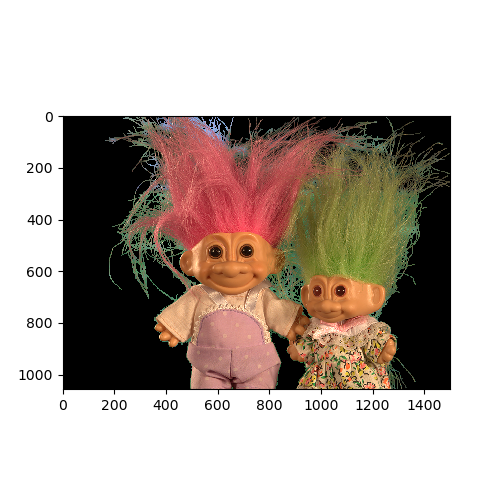

In [12]:
plt::figure_size(500,500);
plt::imshow(copyWithMask);
auto pltImg = displayImage(copyWithMask);
pltImg

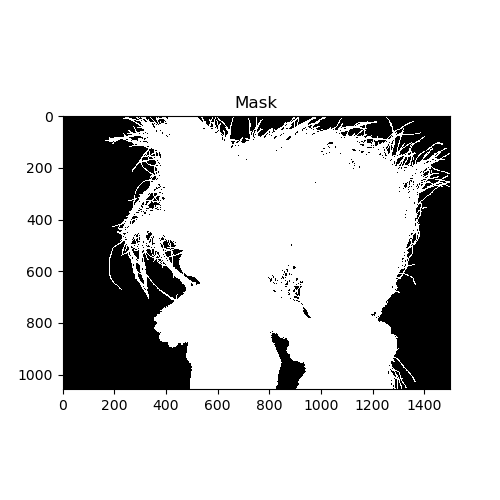

In [13]:
plt::figure_size(500,500);
plt::imshow(bgra[3] > 0);
plt::title("Mask");
pltImg = displayImage(bgra[3] > 0);
pltImg

In [14]:
// Read background image
Mat background = imread(DATA_PATH + "images/backGroundLarge.jpg");

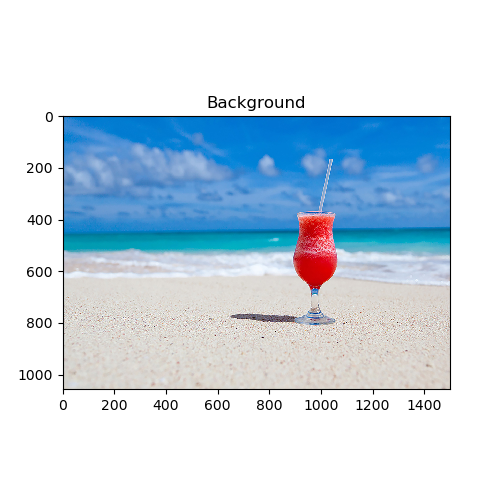

In [15]:
plt::figure_size(500,500);
plt::imshow(background);
plt::title("Background");
pltImg = displayImage(background);
pltImg

In [16]:
// Convert Mat to float data type
foreground.convertTo(foreground, CV_32FC3);
background.convertTo(background, CV_32FC3);
alpha.convertTo(alpha, CV_32FC3, 1.0/255); // keeps the alpha values betwen 0 and 1

In [17]:
// Number of iterations to average the performane over
int numOfIterations = 1; //1000;

In [18]:
// Alpha blending using functions multiply and add
Mat outImage= Mat::zeros(foreground.size(), foreground.type());
double t = (double)getTickCount();
for (int i=0; i<numOfIterations; i++) {
    outImage = blend(alpha, foreground, background, outImage);
}
t = ((double)getTickCount() - t)/getTickFrequency();
cout << "Time for alpha blending using multiply & add function : " << 
    t*1000/numOfIterations << " milliseconds" << endl;

Time for alpha blending using multiply & add function : 37.3083 milliseconds


In [19]:
// Alpha blending using direct Mat access with for loop
outImage = Mat::zeros(foreground.size(), foreground.type());
t = (double)getTickCount();
for (int i=0; i<numOfIterations; i++) {
    outImage = alphaBlendDirectAccess(alpha, foreground, background, outImage);
}
t = ((double)getTickCount() - t)/getTickFrequency();
cout << "Time for alpha blending using alphaBlendDirectAccess : " << 
    t*1000/numOfIterations << " milliseconds" << endl;

Time for alpha blending using alphaBlendDirectAccess : 16349 milliseconds


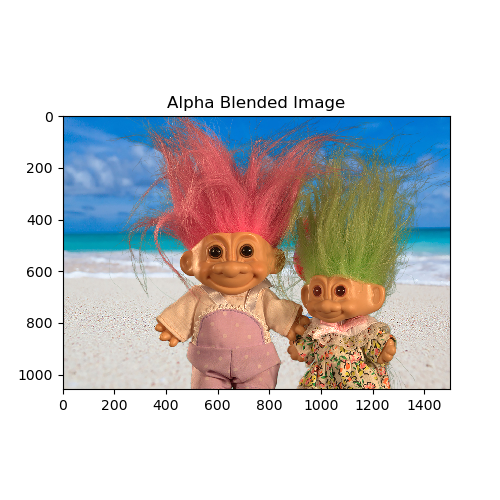

In [20]:
plt::figure_size(500,500);
plt::imshow(outImage/255);
plt::title("Alpha Blended Image");
pltImg = displayImage(outImage/255);
pltImg

## <font style = "color:rgb(50,120,229)">Runtime Comparison</font>

In the table below, we show the runtime comparison of the two methods on images of various sizes. The numbers are the average time taken over 3000 runs. As you can see for larger images, the efficient method that makes a single pass over the images takes less than half the time! It is not clear why the single pass method is slightly worse for small images. 
       
<table>
    <tr>
        <th width="20%"><center>Image Size</center></th>
        <th width="30%"><center>Using functions - multiply, add(in milliseconds)</center></th>
        <th width="30%"><center>Using direct access(in milliseconds)</center></th>
    </tr>
    <tr>
        <td><center>230 x   162</center></td>
        <td><center>0.156</center></td>
        <td><center>0.364</center> </td>
    </tr>
    <tr>
        <td><center>1000 x   704</center></td>
        <td><center>7.856</center></td>
        <td><center>7.102</center></td>
    </tr>
    <tr>
        <td><center>2296 x 1617</center></td>
        <td><center>54.014</center></td>
        <td><center>39.985</center></td>
    </tr>
    <tr>
        <td><center>4592 x 3234</center></td>
        <td><center>355.502</center></td>
        <td><center>161.340</center></td>
</table>

# <font style = "color:rgb(50,120,229)">References and Further Reading</font>

[https://en.wikipedia.org/wiki/Alpha_compositing](https://en.wikipedia.org/wiki/Alpha_compositing)